<a href="https://colab.research.google.com/github/FlorianGelb/GNNProject/blob/K_sparse/K_SAE_Corrupted_data_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms,datasets
from torch.utils.data import Dataset,DataLoader,random_split,Subset
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image

In [ ]:
#data = pd.read_csv('CorruptedFashionMNIST/Names.csv')
data = pd.read_csv('DataPreparation/CorruptedFashionMNIST/Names.csv')
transform = transforms.ToTensor()

In [ ]:
class FashionMNISTDataset(Dataset):
    def __init__(self,dataframe,root_dir,transform=None):
        self.dataframe=dataframe
        self.root_dir = root_dir
        self.transform=transform
    def __len__(self):
        return len(self.dataframe)
    def __getitem__(self,idx):
        img_name=os.path.join(self.root_dir,self.dataframe.iloc[idx,0])
        image=Image.open(img_name)
        label=self.dataframe.iloc[idx,1]
        if self.transform:
            image=self.transform(image)
        return image,label

In [ ]:
root_dir = 'DataPreparation/CorruptedFashionMNIST'
dataset = FashionMNISTDataset(dataframe=data,root_dir=root_dir,transform=transform)


In [ ]:
subset_size=int(0.3 * dataset.__len__())

In [ ]:

indices = torch.randperm(len(dataset)).tolist()
subset_indices = indices[:subset_size]
subset_dataset = Subset(dataset, subset_indices)

In [ ]:
# Split the subset dataset into train and test sets
train_size = int(0.8 * len(subset_dataset))  # 80% for training
test_size = len(subset_dataset) - train_size  # Remaining for testing

train_dataset, test_dataset = random_split(subset_dataset, [train_size, test_size])

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader, random_split, Subset

import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from K_SAE import Net,plot,train,test

%matplotlib inline


In [ ]:

sequence = [50 - 5 * i for i in range(10)]
print(sequence)

[50, 45, 40, 35, 30, 25, 20, 15, 10, 5]


In [ ]:

layers=[28*28,128,64,50]
#models = {"15": Net(layers,15), "20": Net(layers,20),"50": Net(layers,50), "80": Net(layers,80),"128": Net(layers,128)}
models={str(k): Net(layers,k) for k in sequence}
train_log = {k: [] for k in models}
test_log = {k: [] for k in models}

In [ ]:
models["50"]

Net(
  (E): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=784, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=50, bias=True)
    )
  )
  (D): Decoder(
    (decoder): Sequential(
      (0): Linear(in_features=50, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=784, bias=True)
    )
  )
)

In [ ]:
models["50"]
for epoch in range(1, 50):
    for model in models.values():
        model.train()
    train(train_loader, epoch, models, train_log)

    for model in models.values():
        model.eval()
    test(models, test_loader, test_log)



Train Epoch: 1 [0/14400 (0%)]	Losses 50: 0.001737 45: 0.001703 40: 0.001654 35: 0.001873 30: 0.001837 25: 0.001932 20: 0.002023 15: 0.002244 10: 0.002366 5: 0.003481
Train Epoch: 1 [12800/14400 (89%)]	Losses 50: 0.001797 45: 0.001795 40: 0.001715 35: 0.001923 30: 0.001895 25: 0.002075 20: 0.002177 15: 0.002391 10: 0.002605 5: 0.003654
Train Epoch: 1 [14400/14400 (100%)]	Losses 50: 0.001727 45: 0.001699 40: 0.001646 35: 0.001881 30: 0.001851 25: 0.001997 20: 0.002123 15: 0.002346 10: 0.002543 5: 0.003537
Test set:
50: loss: 0.0018	
45: loss: 0.0018	
40: loss: 0.0018	
35: loss: 0.0020	
30: loss: 0.0019	
25: loss: 0.0021	
20: loss: 0.0022	
15: loss: 0.0024	
10: loss: 0.0025	
5: loss: 0.0037	

Train Epoch: 2 [0/14400 (0%)]	Losses 50: 0.002054 45: 0.002018 40: 0.001956 35: 0.002206 30: 0.002185 25: 0.002283 20: 0.002399 15: 0.002615 10: 0.002831 5: 0.003924
Train Epoch: 2 [12800/14400 (89%)]	Losses 50: 0.001797 45: 0.001781 40: 0.001728 35: 0.001936 30: 0.001925 25: 0.002088 20: 0.002165 15

In [ ]:

for k in models:
  torch.save(models[k].state_dict(), f'SavedModels/FashionMINST_weights_{k}_Relu_128_64_50.pth')


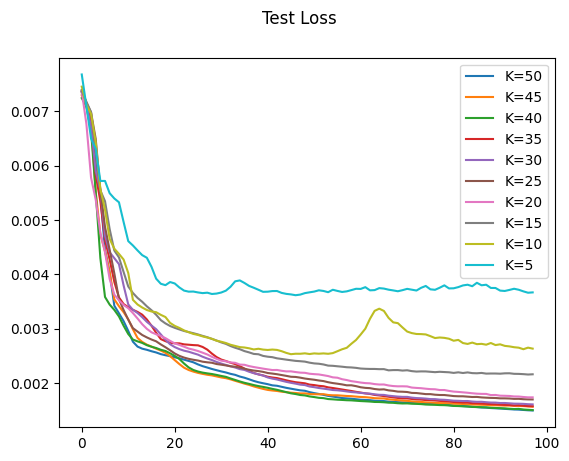

In [ ]:
for k in test_log:
    plt.plot(test_log[k], label=f'K={k}')

plt.legend()
plt.suptitle('Test Loss')
plt.show()
